In [62]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import os
import math
from pathlib import Path

os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'])
        time_array = np.array(file['times'])
    file.close()
    return (data_array, time_array)

home = '/home/maikel/'
fvs = '{}/Development/FiniteVolumeSolver/'.format(home)
build = '{}/build_2D-Release/'.format(fvs)

hlle_path = '{}/SodShockTube/HLLE.h5'.format(build)
hlle_data, _ = Load(hlle_path)

cons_path = '{}/SodShockTube/Conservative.h5'.format(build)
cons_data, _ = Load(cons_path)

char_path = '{}/SodShockTube/Characteristics.h5'.format(build)
char_data, _ = Load(char_path)

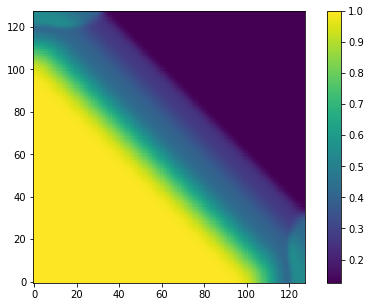

In [63]:
var = 0

hlle_i = min(60, char_data.shape[0] - 1)
hlle_q = hlle_data[hlle_i, var, :, :] 

f = plt.figure(figsize=(8, 5))

im = plt.imshow(hlle_q, origin='Lower', interpolation='None')
plt.colorbar()
plt.show()

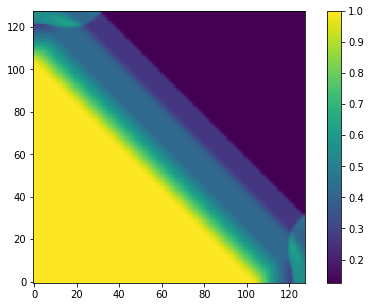

In [64]:
var = 0

cons_i = min(30, char_data.shape[0] - 1)
cons_q = cons_data[cons_i, var, :, :] 

f = plt.figure(figsize=(8, 5))

im = plt.imshow(cons_q, origin='Lower', interpolation='None')
plt.colorbar()
plt.show()

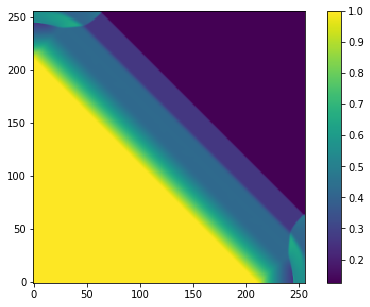

In [65]:
var = 0

cons_i = min(30, char_data.shape[0] - 1)
cons_q = char_data[cons_i, var, :, :] 

f = plt.figure(figsize=(8, 5))

im = plt.imshow(cons_q, origin='Lower', interpolation='None')
plt.colorbar()
plt.show()